In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage



In [6]:
#import the .csv file from github
df = pd.read_csv('https://raw.githubusercontent.com/DK01git/Mall_CustomerSegmentation/master/Mall_Customers.csv', delimiter=',')


#import pandas as pd
#df = pd.read_csv('https://github.com/DK01git/Mall_CustomerSegmentation/blob/2ce529dc38c6236a157e10ce36b67b78d9a32138/Mall_Customers.csv', delimiter='/')


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#checking null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#basic stats
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


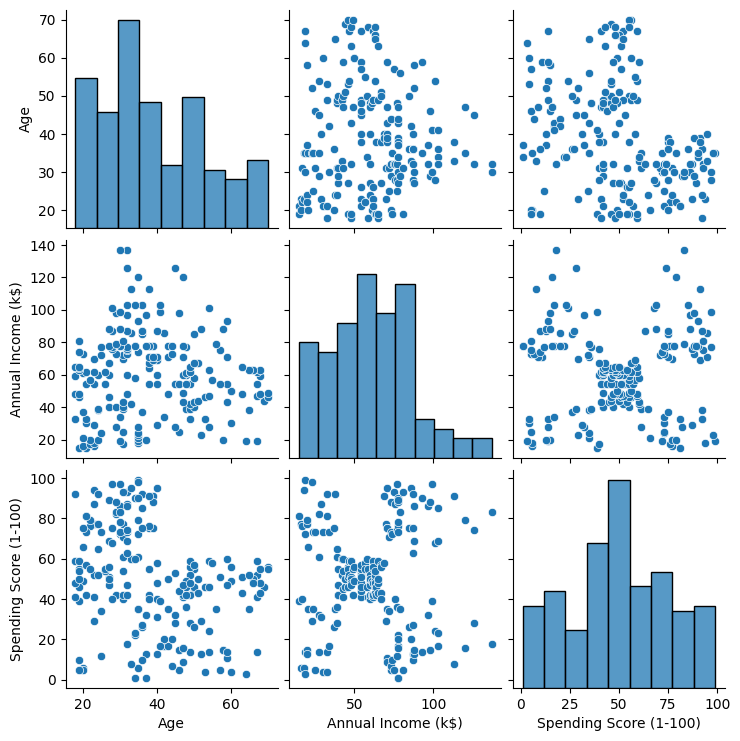

In [8]:
#plot 3 variables
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [9]:
#convert categorical to numerical
label_encorder = preprocessing.LabelEncoder()

df['Genre'] = label_encorder.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


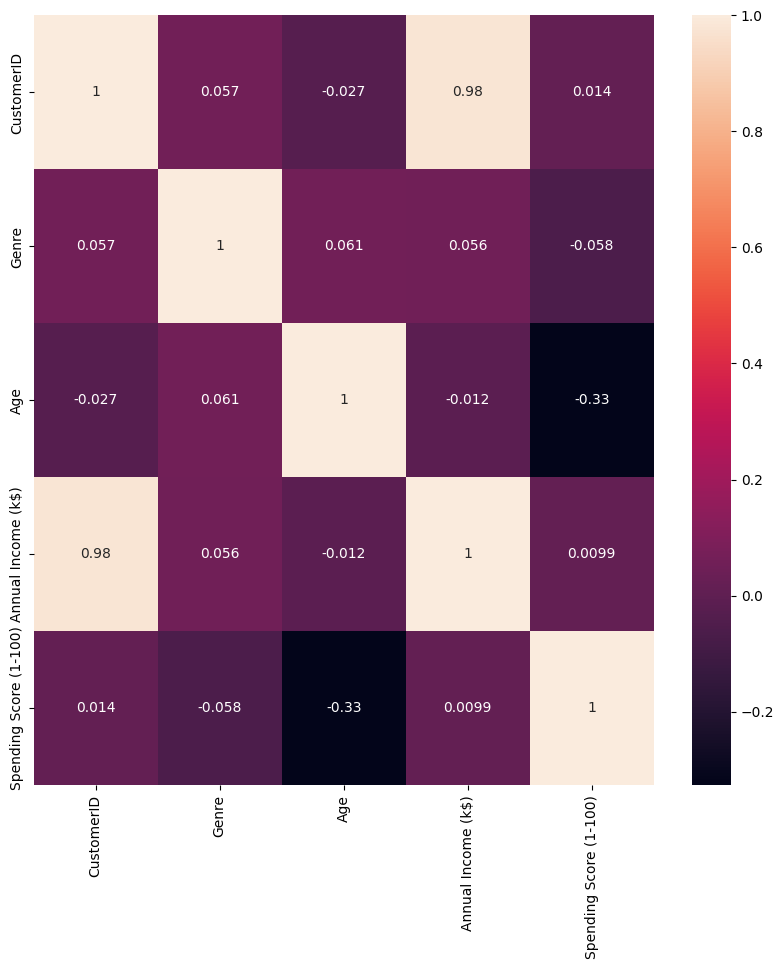

In [11]:
#plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Feature Selection

In [13]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]


Hierarchycal Clustering

In [14]:
linked = linkage(x, 'ward')

Dendogram for Hierarchycal Clustering

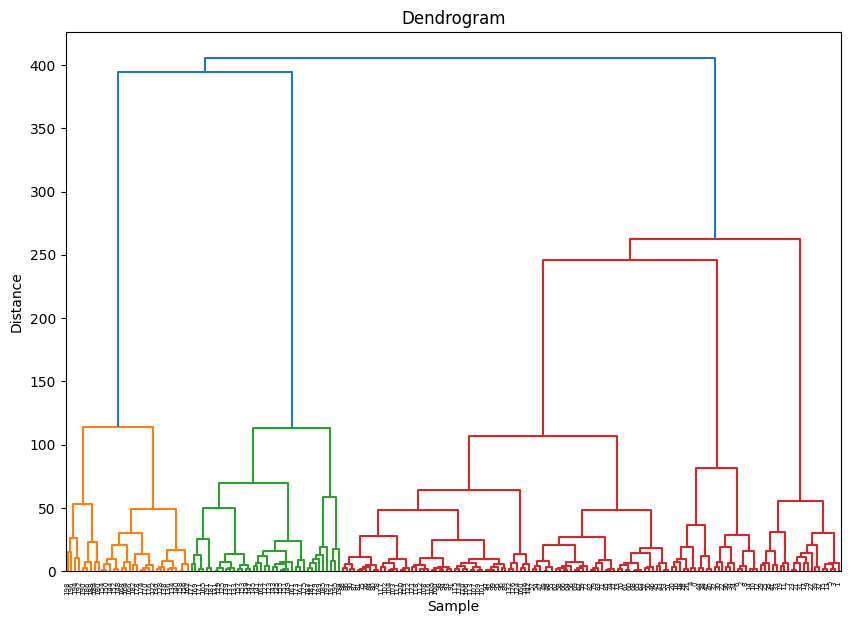

In [16]:
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

Agglomerative Clustering Model Training

Training the model with 5 clusters using Euclidean distance and 'ward' linkage.

In [17]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

c:\Users\dkout\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [19]:
df['Cluster'] = y_hc

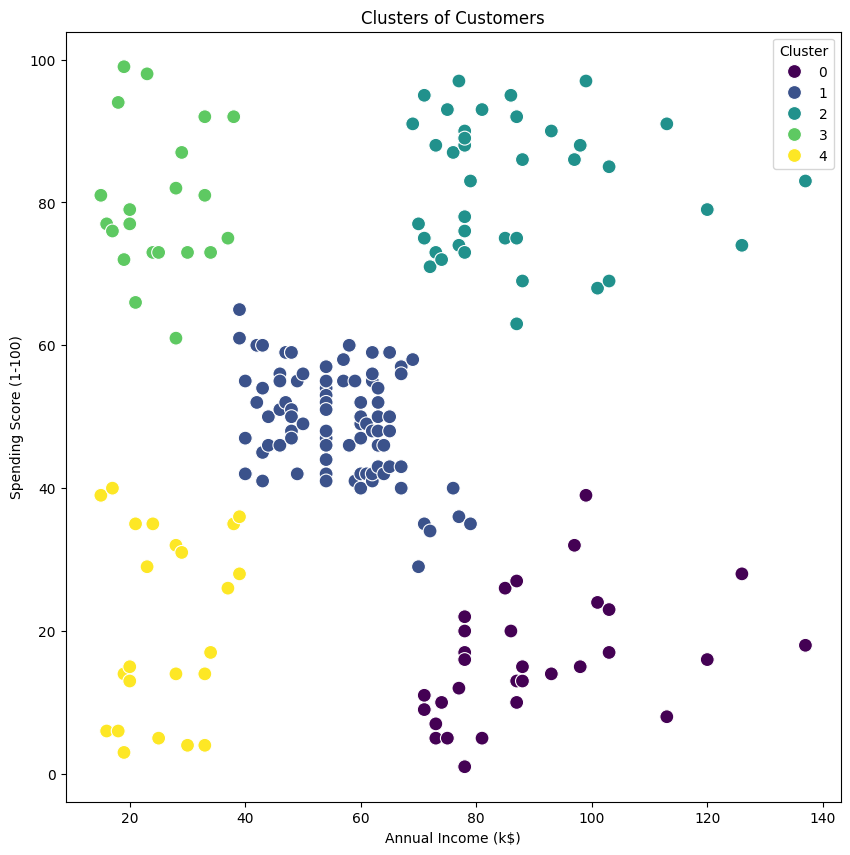

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', 
                data=df, palette='viridis', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [22]:
from sklearn import metrics

silhouette_score = metrics.silhouette_score(x, y_hc)
print('Silhouette Score: {}'.format(silhouette_score))

Silhouette Score: 0.5529945955148897


Plot using 3D plots

In [23]:
import plotly.graph_objs as go 
import plotly.offline as py 

In [25]:
sample = go.Scatter3d(
    x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], z=df['Age'],
    mode='markers',
    marker=dict(color=df['Cluster'], size=10, line=dict(color=df['Cluster'],
            width=12), opacity=0.8)
)

data_plt = [sample]
layout = go.Layout(title = 'Clusters using Agglomerative Clustering Algorithm',
    scene = dict(
        xaxis=dict(title='Annual Income (k$)'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Age'))
                    )

fig = go.Figure(data=data_plt, layout=layout)
py.iplot(fig)